## CMPINF 2100 - Final project feedback

### PPG: customer churn

This report gives general feedback from the proposals about the final project. In addition to addressing pitfalls, multiple recommendations are provided to help with performing the analysis for the project.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('ppg_churn_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

## Comments

### Categorical inputs

It was good to see so many of the proposals checking the number of unique values for each variable in the data set. However, just because a variable has a few unique values does not necessarily mean it *must* be converted to a category. It is usually a useful hint that if the number of unique values is low we should consider converting a variable to a category. But we should **not** view this as a definite rule to always apply. 

Let's check the number of unique values.

In [3]:
df.nunique()

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64

The `state` variable is an object data type (string). It is thus a categorical variable even though there are 51 unique values. The `area_code`, `international_plan`, and `voice_mail_plan` variables have less than 4 unique values and the `.info()` method revealed these variables are also object data types. Before converting to a categorical though, it is a good idea to check the unique values. As shown in the output of the cells below, it is seems safe to assume that `area_code` through `voice_mail_plan` are truly categorical variables.

In [4]:
df.area_code.value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area_code, dtype: int64

In [5]:
df.international_plan.value_counts()

no     4527
yes     473
Name: international_plan, dtype: int64

In [6]:
df.voice_mail_plan.value_counts()

no     3677
yes    1323
Name: voice_mail_plan, dtype: int64

The issue is more difficult with `total_intl_calls` and `number_customer_service_calls`. Both variables have less than 25 unique values, and both are integer data types. Let's look at bar charts to see the counts of the unique values. The bar chart for `total_intl_calls` is below. We see that values greater than 12 have very low frequencies. Such low counts might pose challenges if we convert this variable to a categorical when we train and assess model behavior. Just why these challenges can occur will make more sense when we discuss **cross-validation**.

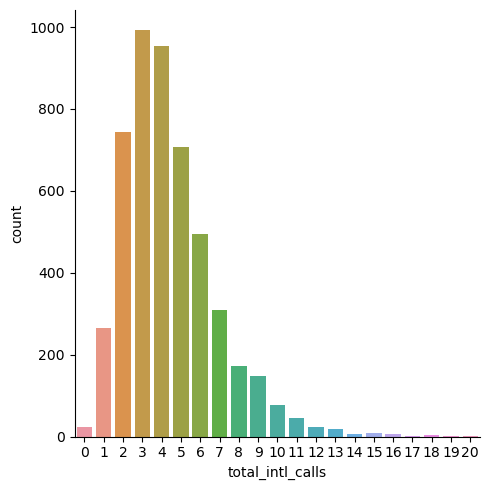

In [8]:
sns.catplot(data = df, x='total_intl_calls', kind='count')

plt.show()

For this reason, I recommend two approaches to consider as you start working with this application. 

* First, treat `total_intl_calls` as a continuous input and not a categorical. You do not have to modify the variable in order to treat it as a continuous number. 

* Second, bin `total_intl_calls` based on its *quartiles*. The cell below shows you how to use the `pd.qcut()` function to create the binned variable.

In [9]:
df_copy = df.copy()

df_copy['bin_total_intl_calls'] = pd.qcut( df_copy.total_intl_calls, q = 4 )

The bar chart for the binned variable is shown below. We no longer have low frequency categories!

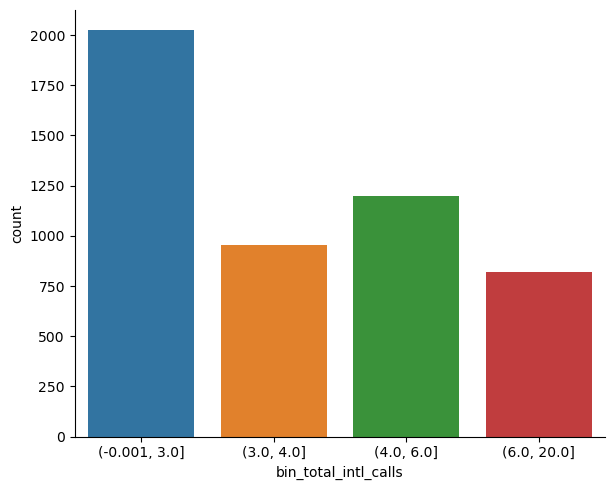

In [10]:
sns.catplot(data = df_copy, x='bin_total_intl_calls', kind='count', aspect=1.25)

plt.show()

It is important to check the counts of the binary output, `churn`, for each of the new binned categories of `bin_total_intl_calls`.

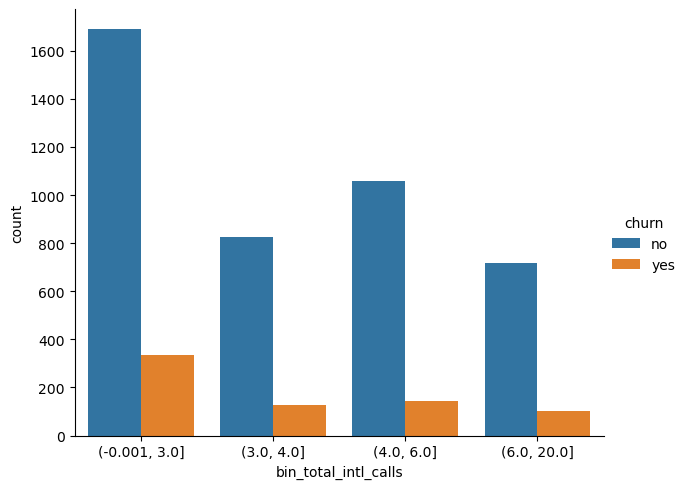

In [11]:
sns.catplot(data = df_copy, x='bin_total_intl_calls', hue='churn', kind='count', aspect=1.25)

plt.show()

Next, let's look at the bar chart for `number_customer_service_calls`. We again see that there are several low frequency categories!

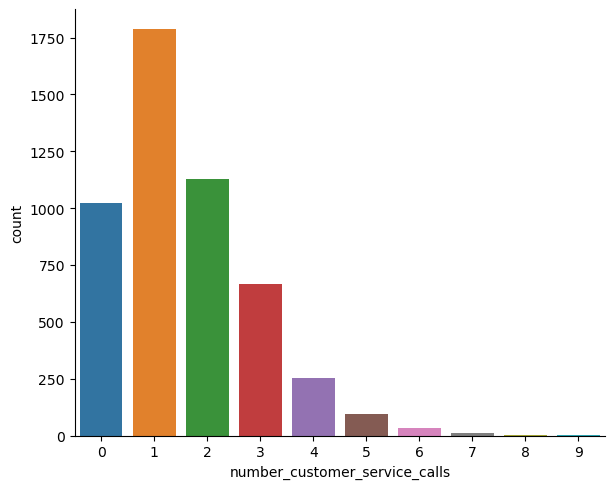

In [12]:
sns.catplot(data = df, x='number_customer_service_calls', kind='count', aspect=1.25)

plt.show()

As is the case with `total_intl_calls`, if we convert `number_customer_service_calls` to a category we will have multiple low frequency categories to deal with. You will learn why this is a challenging situation later.

This again leads to two potential approaches. First, treat `number_customer_service_calls` as a numeric input. As for the second, rather than using quartiles to group categories together, let's "lump" all values greater than 3 into a single "other" category. The `.info()` method shows that `lump_number_customer_service_calls` is an object type.

In [13]:
df_copy['lump_number_customer_service_calls'] = np.where( df_copy.number_customer_service_calls > 3, 'Other', df_copy.number_customer_service_calls.astype('str'))

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   state                               5000 non-null   object  
 1   account_length                      5000 non-null   int64   
 2   area_code                           5000 non-null   object  
 3   international_plan                  5000 non-null   object  
 4   voice_mail_plan                     5000 non-null   object  
 5   number_vmail_messages               5000 non-null   int64   
 6   total_day_minutes                   5000 non-null   float64 
 7   total_day_calls                     5000 non-null   int64   
 8   total_day_charge                    5000 non-null   float64 
 9   total_eve_minutes                   5000 non-null   float64 
 10  total_eve_calls                     5000 non-null   int64   
 11  total_eve_charge              

The bar chart shows that we now have 5 unique values.

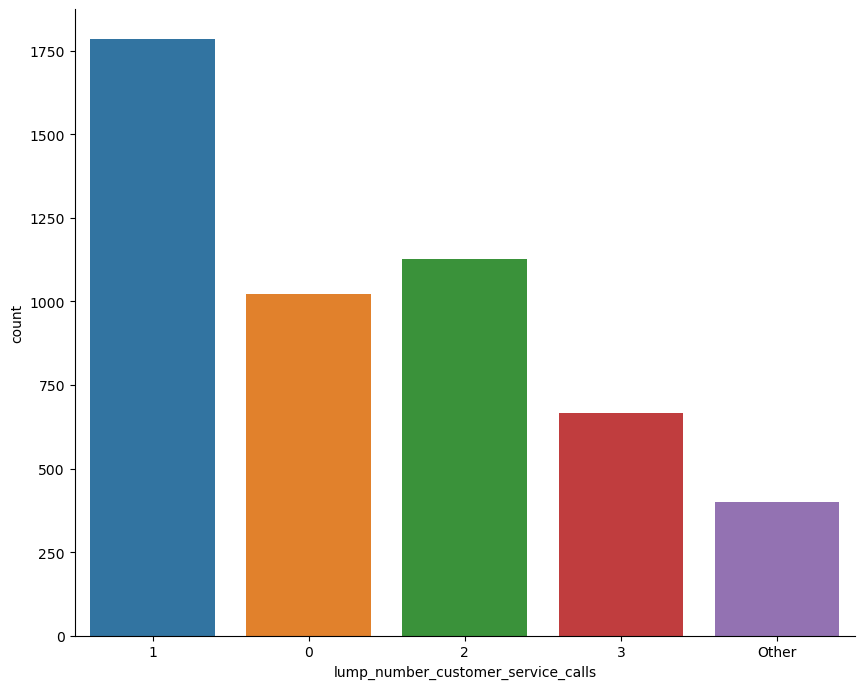

In [15]:
sns.catplot(data = df_copy, x='lump_number_customer_service_calls', kind='count', height=7, aspect=1.25)

plt.show()

Setting the `normalize` argument to `True` in `.value_counts()` Shows that the `'Other'` category accounts for just under 8% of the observations.

In [16]:
df_copy.lump_number_customer_service_calls.value_counts(normalize=True)

1        0.3572
2        0.2254
0        0.2046
3        0.1330
Other    0.0798
Name: lump_number_customer_service_calls, dtype: float64

Next, let's look at the counts for the binary outcome, `churn`, for the lumped variable `lump_number_customer_service_calls`. Can you identify a change in the proportion of the `churn='yes'` category based on the value of `lump_number_customer_service_calls`?

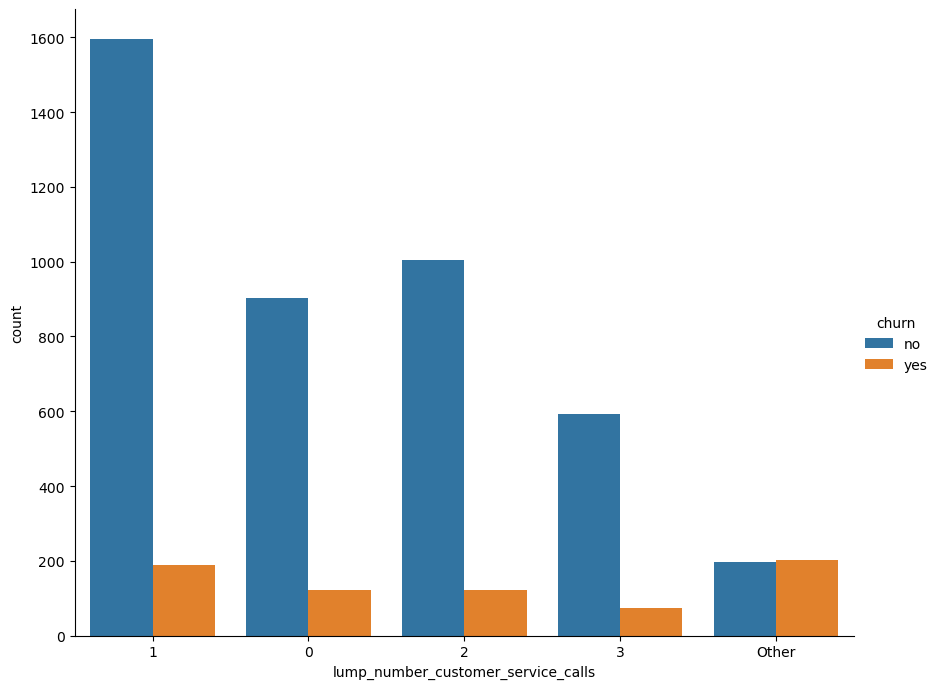

In [17]:
sns.catplot(data = df_copy, x='lump_number_customer_service_calls', hue='churn', kind='count', height=7, aspect=1.25)

plt.show()

When using lumped or binned variables, it is especially important to check combinations of the variables. The bar chart below shows the number of observations for each `bin_total_intl_calls` grouped by `lump_number_customer_service_calls`.

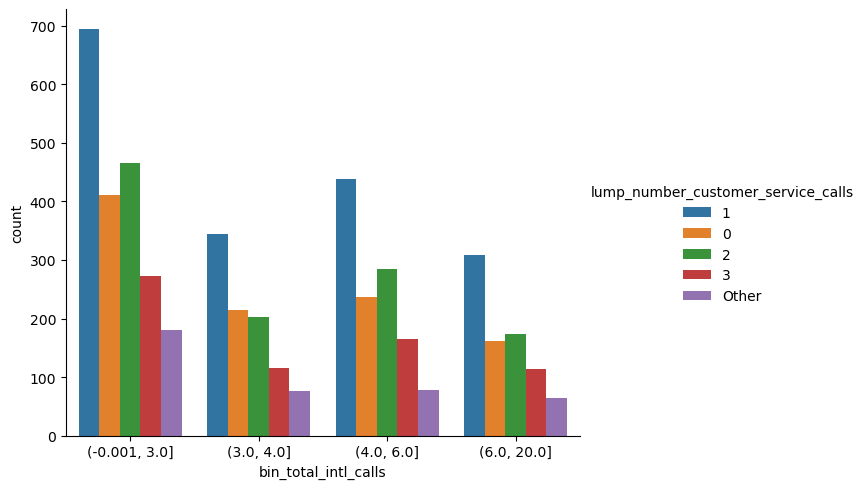

In [18]:
sns.catplot(data = df_copy, x='bin_total_intl_calls', hue='lump_number_customer_service_calls', 
            kind='count', aspect=1.25)

plt.show()

And we should check the counts of the binary outcome, `churn`, for the combinations of the two binned and lumped variables. 

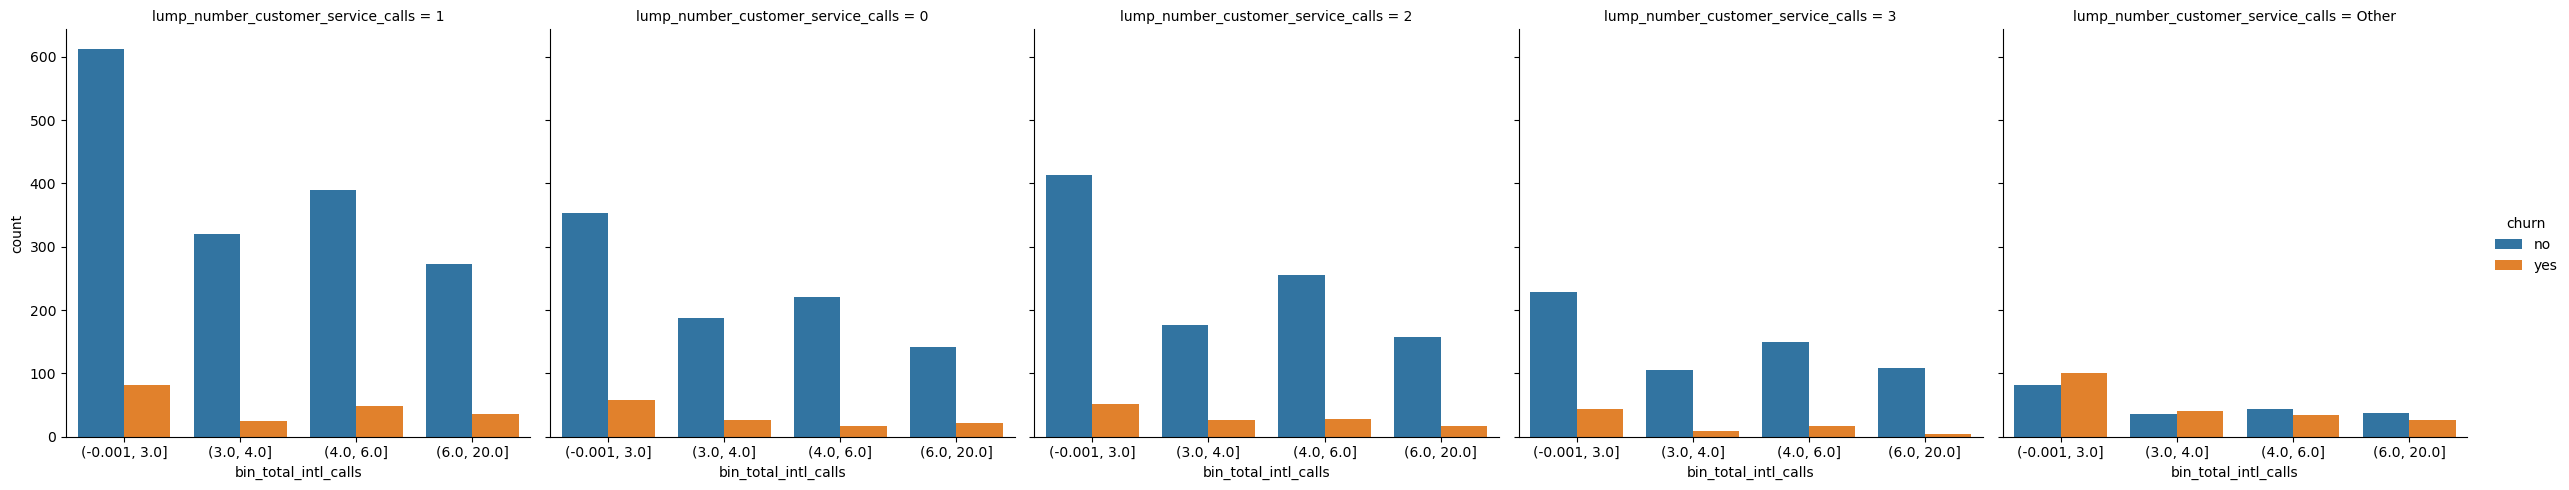

In [19]:
sns.catplot(data = df_copy, x='bin_total_intl_calls', hue='churn', 
            col='lump_number_customer_service_calls', kind='count')

plt.show()

### Continuous inputs

All proposals examined the distributions of the continuous inputs, which was great to see. However, let's spend some extra time with a few of those inputs.

In [20]:
numeric_inputs = df.select_dtypes('number').copy().columns.to_list()

Let's reshape the numeric inputs into a long-format dataframe.

In [23]:
lf_numeric = df.copy().reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'churn'], value_vars=numeric_inputs, ignore_index=True)

In [24]:
lf_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rowid     75000 non-null  int64  
 1   churn     75000 non-null  object 
 2   variable  75000 non-null  object 
 3   value     75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


The distributions for each of the numeric inputs are visualized in the cell below. We have already discussed `total_intl_calls` and `number_customer_service_calls`. The rest of the numeric inputs have distributions that look roughly Gaussian (bell-curve like) **except** for `number_vmail_messages`. The `number_vmail_messages` distribution is very odd!

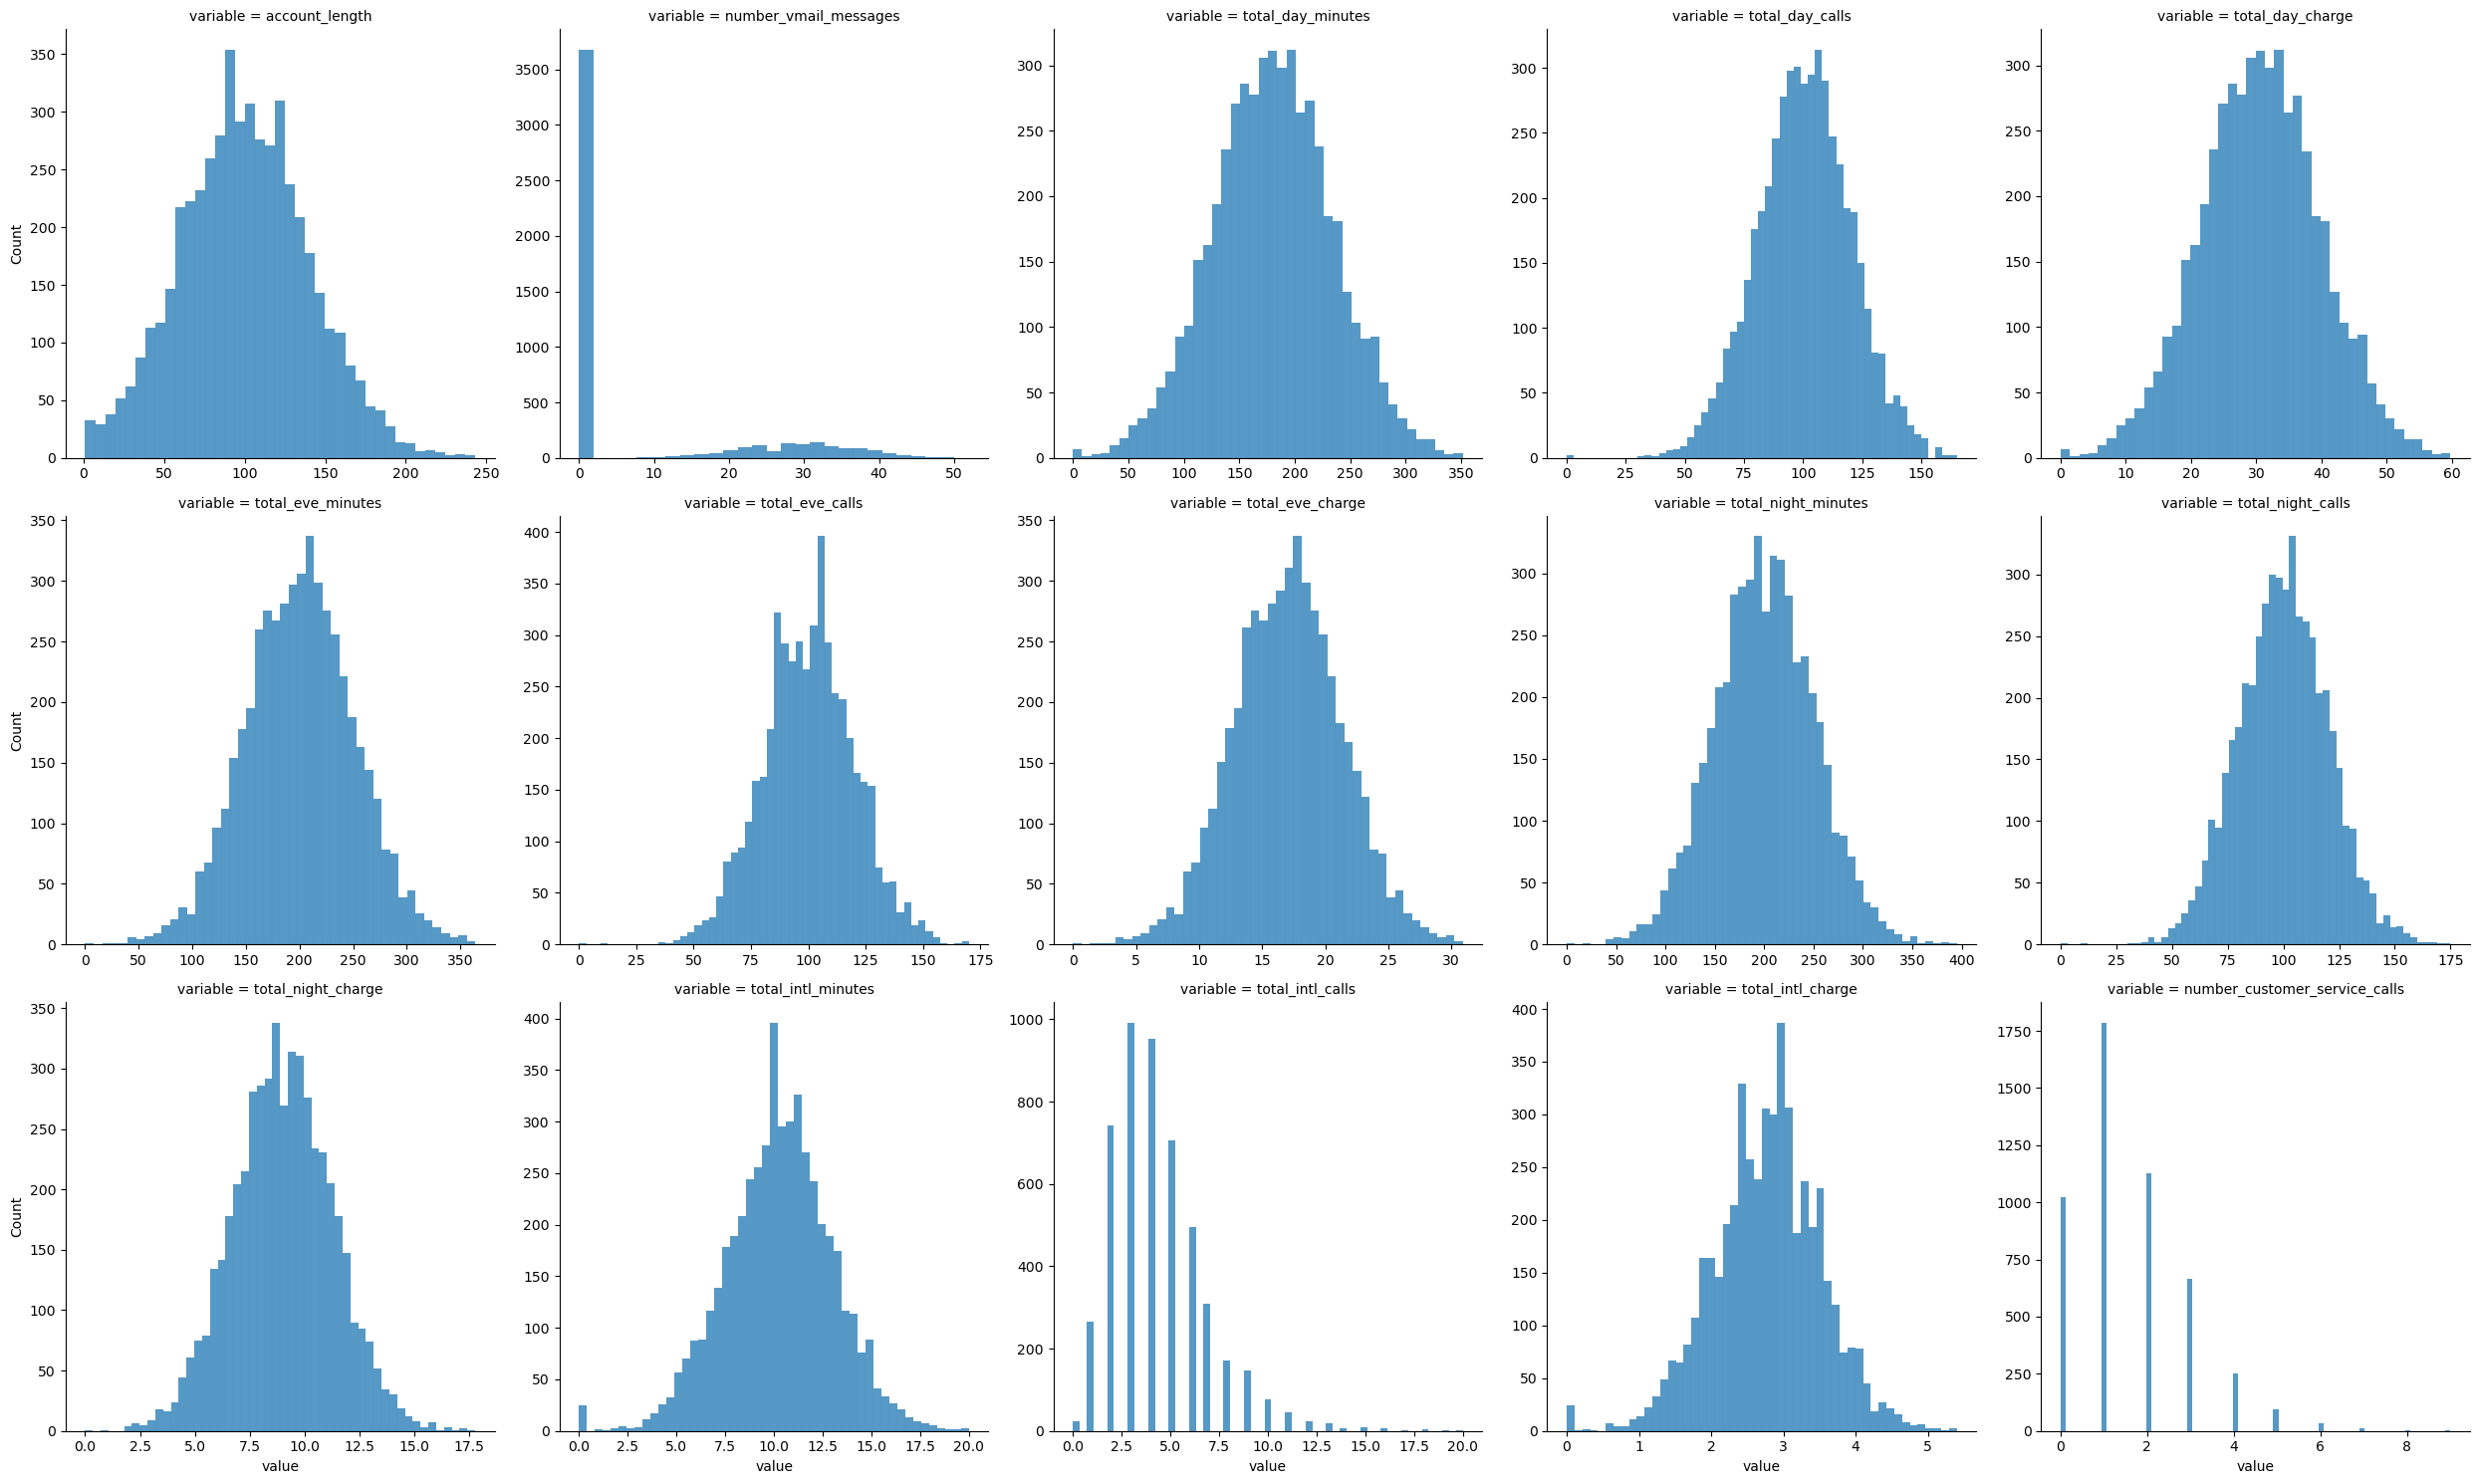

In [25]:
sns.displot(data = lf_numeric, x='value', col='variable', col_wrap=5,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

If we focus on `X06`, we see that there is a "spike" of values near zero! 

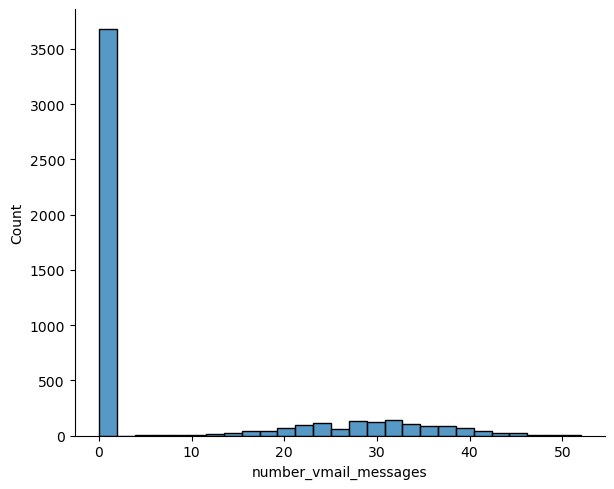

In [28]:
sns.displot(data = df, x='number_vmail_messages', kind='hist', aspect=1.25)

plt.show()

The `number_vmail_messages` distribution is challenging because it essentially represents a combination of two kinds of distributions. The first distribution is categorical and considers if the value of `number_vmail_messages` is 0 or not. Let's check this by calculating the proportion of observations with `number_vmail_messages == 0`. As we see below nearly 74% of the observations have `number_vmail_messages` at a single number!

In [30]:
np.mean( df.number_vmail_messages == 0 )

0.7356

The second type of distribution associated with `number_vmail_messages` is a continuous distribution for the non-zero values. As we see below, this distribution looks roughly Gaussian.

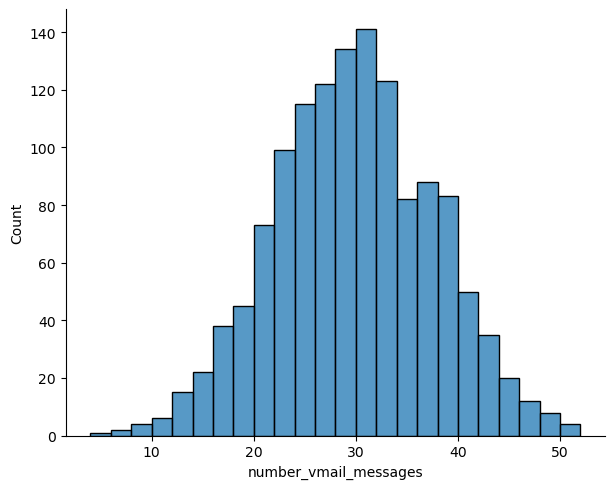

In [31]:
sns.displot(data = df.loc[ df.number_vmail_messages > 0, :], 
            x='number_vmail_messages', kind='hist', aspect=1.25)

plt.show()

There are several approaches to try and deal with `number_vmail_messages` in this application. The first is to treat it as numeric variable and ignore the **zero inflated** behavior and thus work with `number_vmail_messages` "as it is". The second is to convert it into a categorical variable consisting of two unique values: `number_vmail_messages == 0` and `number_vmail_messages > 0`. The third approach is to cut the continuous variable into a categorical variable based on intervals of `number_vmail_messages`. You may use the `pd.cut()` to cut based on interval size or `pd.qcut()` to cut based on the quantiles. You have seen several ways of creating the effective categorical variable already, so try to create the effective categorical variable from `number_vmail_messages` on your own!

### Binary outcome

The output variable `churn` is binary. It was great that many of you examined the counts of `churn` with a bar chart.

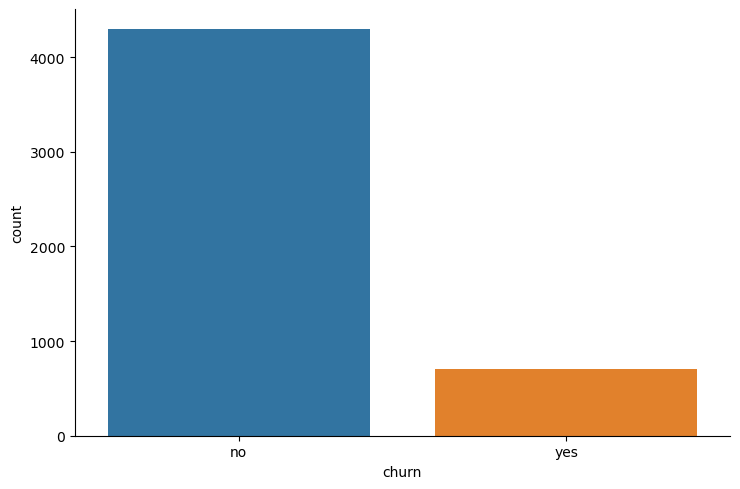

In [32]:
sns.catplot(data = df, x = 'churn', kind='count', aspect=1.5)

plt.show()

It is **critically important** to not ignore this bar chart! The bar chart shows us that `churn` is **imbalanced**. There are few observations of `churn = 'yes'` compared to `churn = 'no'`. The *sampling imbalance* makes this problem very challenging. We will discuss why over the next several weeks.  

However, it can be helpful to consider the **proportion** instead of the count to know just why the imbalanced data poses a problem. The `normalize` argument is set to `True` in the `.value_counts()` method below. The output reveals `churn = 'yes'` occurs in less than 15% of the observations!

In [33]:
df.churn.value_counts(normalize=True)

no     0.8586
yes    0.1414
Name: churn, dtype: float64

In the clustering section of the proposal, many of you correctly examined the proportion of `churn = 'yes'` observations associated with the identified cluster groups. However, you are not necessarily looking for `churn = 'yes'` to occur near 100% in a cluster. Instead, due to the imbalanced nature of this application what really matters is that `churn = 'yes'` occurs more than about 15%! Thus, clusters containing more than 25% to 30% `churn = 'yes'` observations are different from the whole data!

### Predictive modeling recommendations

As you have seen in this report, there are multiple ways of representing several of the variables in this application. `total_intl_calls`, `number_customer_service_calls`, and `number_vmail_messages` can be treated as continuous inputs or they can be treated as categorical inputs. Rather than picking a single approach, you **must** compare the performance of the binary classifiers when these variables are treated as continuous vs treating them as categorical.

Thus, you must fit binary classifiers with `total_intl_calls` as continuous and again as categorical. You must fit binary classifiers with `number_customer_service_calls` as continuous and again as categorical. Finally, you must fit binary classifiers with `number_vmail_messages` as continuous and again as categorical. It will be up to you as to the number of combinations of these approaches you should try vs trying out various formulations (additive, interactions, and polynomials) involving the other features. But, you **must** try out these different approaches and identify which approach gives the best performing model.